# 주성분 분석

k-means를 사용하는 것은 좋다. 근데 계속해서 사진이 쌓이다보니 저장 공간이 부족하다. 

--> 클러스터링이나 분류에 영향을 끼치지 않으면서 '샘플'을 압축할 수 있을까?


차원(dimension)
- 데이터가 가진 속성 --> 특성
- 앞서 예시로 사용한 과일 이미지에는 10,000개의 픽셀이 존재 --> 10000개의 특성
- 머신러닝에서의 특성 == 차원
    - 단, 1차원 배열과 다차원 배열에서 차원의 의미는 서로 다르다.
    - 1차원 배열(벡터): 원소의 개수
    - 다차원 배열: 축의 개수
- 이 10000개의 차원을 줄일 수 있을까?

차원 축소 (demensionality reduction)
- 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고, 지도 학습 모델의 성능을 향상시킬 수 있는 방법
- 또한, 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있다.


주성분 분석(PCA; principal component analysis)
- 대표적인 차원 축소 알고리즘
- 데이터에 있는 분산이 큰 방향을 찾는 것
    - 분산: 데이터가 널리 퍼져있는 정도
    - 분산이 큰 방향: 데이터를 잘 표현하는 임의의 벡터

---


예) 우상향 방향으로 샘플이 흩뿌려져 있는 평면 그래프
- (+, +) 방향으로 샘플이 널리 퍼져 있으므로, 그 방향을 '벡터'로 이용할 수 있다.
- 이 벡터를 주성분(principal component)이라고 부른다.
    - 주성분 벡터는 원본 데이터에 있는 어떠한 방향이다.
    - 따라서, 주성분 벡터의 원소 개수 == 원본 데이터셋에 있는 특성 개수
    - 원본 데이터는 이 주성분 벡터를 사용하여 차원을 줄일 수 있다.
        - 예 (+, +) 벡터를 주성분 벡터에 직각으로 투영하면 1차원 데이터를 얻을 수 있다.
- 주성분이 가장 분산이 큰 방향이기 때문에, 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것이다.

- 이후에는 이 벡터에 수직이고, 분산이 가장 큰 다음 벡터를 찾는다.
    - (이 예시에서는 2차원 평면이기 때문에, 두 번째 주성분 벡터는 하나뿐)


---

이제 사이킷런에서 과일 사진 데이터에서 주성분 분석을 수행해보자.

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-01-24 12:59:54--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-01-24 12:59:54--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-01-24 12:59:55--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 주성분 개수 지정
pca.fit(fruits_2d) # 비지도이므로 타깃 제외

PCA(n_components=50)

PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있다.

이 배열의 크기를 확인해보자.

In [4]:
print(pca.components_.shape)

(50, 10000)


pca.components_ 배열의 첫 번째 차원은 주성분의 개수(50), 두 번째 차원은 항상 원본 데이터의 특성 개수(10000).

주성분의 원소는 원본 데이터의 차원과 같으므로, 주성분을 100x100 이미지처럼 출력해보자.

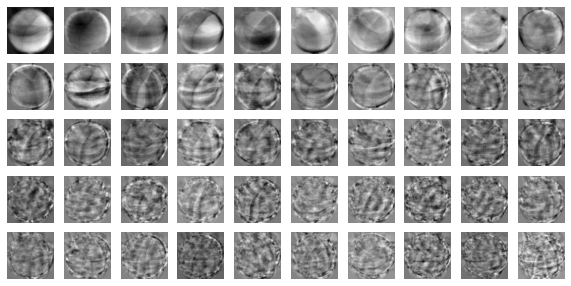

In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1): # arr: [샘플 개수, 너비, 높이]
    n = len(arr) # 샘플 개수
    rows = int(np.ceil(n/10)) # 한 줄에 10개씩 그릴 때, 행의 수
    cols = n if rows < 2 else 10 # 한 줄에 10개씩 그릴 때, 열의 수

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n개 까지만 그린다
                axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다.
- 데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있다.

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄여보자.
- 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 있다.

*2차원, 3차원에서 PCA는 직관적으로 이해할 수 있지만, 이미지 처리에서 얘네는 10000차원이니까 사실상 직관적으로 이해가 안간다.*

*아무튼 원본 이미지들로부터 어떠한 방향성을 우리가 정한 개수만큼(50) 얻었고, 이 방향성에 대해 원본 이미지를 투영시킨다.*

*원본 데이터가 갖고 있던 10000개의 특성(픽셀)이 50개의 방향성에 투영됨으로서 총 50개의 특성으로 차원이 축소된다.*

In [6]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


# 원본 데이터 재구성

차원 축소로 인해 어느 정도 손실이 발생할 수 있지만, 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.

In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


이렇게 복원된 데이터를 100x100 크기로 바꾸어 100개씩 나누어 출력해보자.

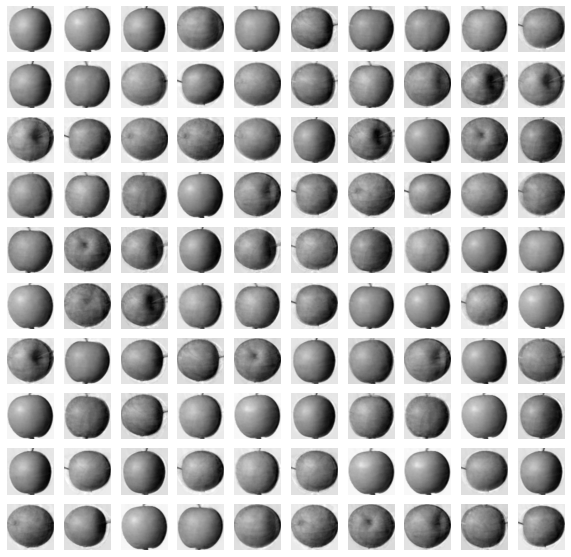

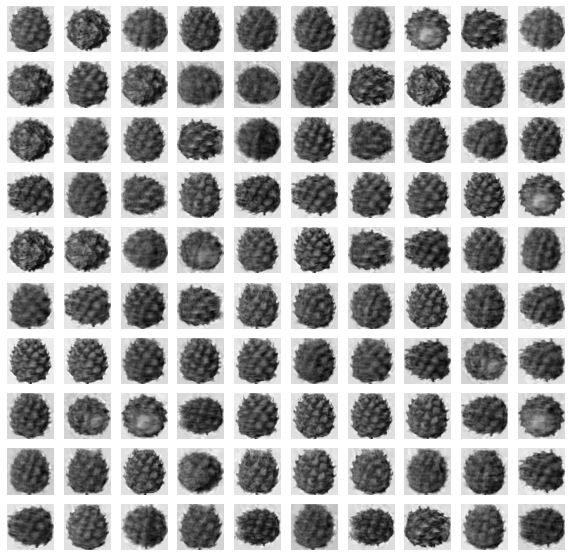

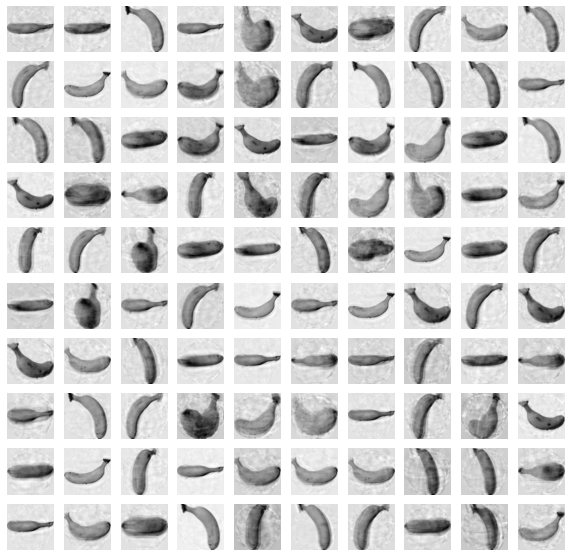

In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

일부 흐리고 번짐이 있지만, 잘 복원 되었다.

만약 주성분을 최대로 사용한다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다.

50개의 특성은 얼마나 분산을 보존하고 있는 것일까?

# 설명된 분산

설명된 분산(explained variance)
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- PCA 클래스의 explained_variance_ratio 에 기록되어 있다.
    - 각 주성분의 설명된 분산 비율이 기록되어 있다.
        - 당연히 첫 번째 주성분의 설명된 분산 비율이 가장 크다.
    - 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [12]:
print(np.sum(pca.explained_variance_ratio_))

0.9214850168835922


92%가 넘는 분산을 유지하고 있다. --> 복원된 데이터 품질이 좋았던 이유

설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는 데 도움이 된다.

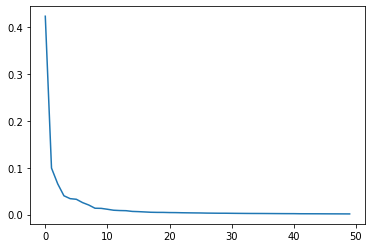

In [13]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

처음 10개의 주성분이 대부분의 분산을 표현하고 있다.
- 그 이후의 주성분이 설명하는 분산은 비교적 작다.

# 다른 알고리즘과 함께 사용하기

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아보자.

3개의 과일 사진을 분류해야 하므로 간단하게 로지스틱 회귀 모델을 사용하자.

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

지도 학습이므로 타깃값을 만들어 주어야 한다.

사과: 0, 파인애플: 1, 바나나: 2 로 지정하여 배열을 만들자.

In [14]:
target = np.array([0]*100 + [1]*100 + [2]*100)

먼저 원본 데이터인 fruits_2d 를 사용해보자.

로지스틱 회귀 모델에서 성능을 가늠해 보기 위해 교차 검증을 수행하자.

In [17]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.5291104316711426


특성이 10000개나 되기 때문에 300개 샘플에 금방 과대적합되기 쉽다.

fit_time 항목에는 각 교차 검증 폴드의 훈련 시간이 기록되어 있다.

다음에는 PCA로 축소한 fruits_pca를 사용하여 비교해보자

In [18]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.029531288146972656


훈련 속도가 엄청 감소했다.

PCA 클래스를 사용할 때, n_components 매개변수에 주성분의 개수 대신, 원하는 설명된 분산의 비율을 입력할 수도 있다.
- PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다.

In [19]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [20]:
print(pca.n_components_)

2


단 두개의 특성으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다

이 모델로 원본 데이터를 변환해보자. 주성분이 2개이므로 변환된 데이터의 크기는 (300, 2)가 될 것이다.

In [21]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


2개의 특성만 사용하고도 교차 검증의 결과가 좋을까?

In [22]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

"""
Convergence Warning: ibfgs failed to converge
로지스틱 회귀 모델이 완전히 수렴하지 못했으니 반복 횟수를 증가시키라는 경고가 출력된다.
"""

0.9933333333333334
0.048623180389404295


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


이번에는 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보자

In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


06-2 에서 원본 데이터를 사용한 결과와 거의 비슷하다.

한번 과일 이미지를 출력해보자.

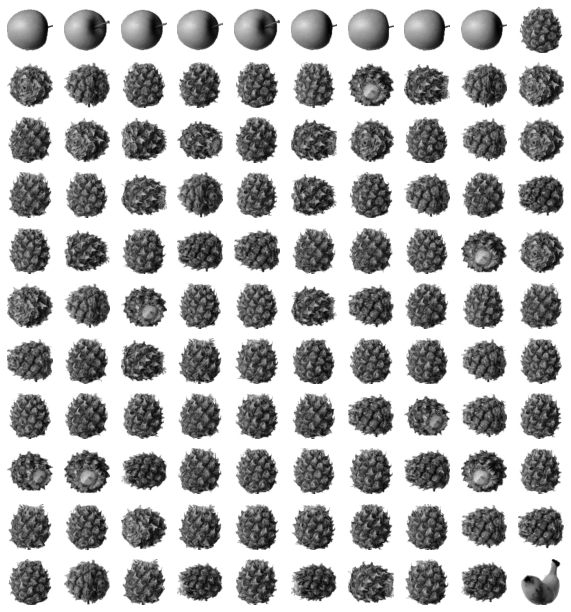

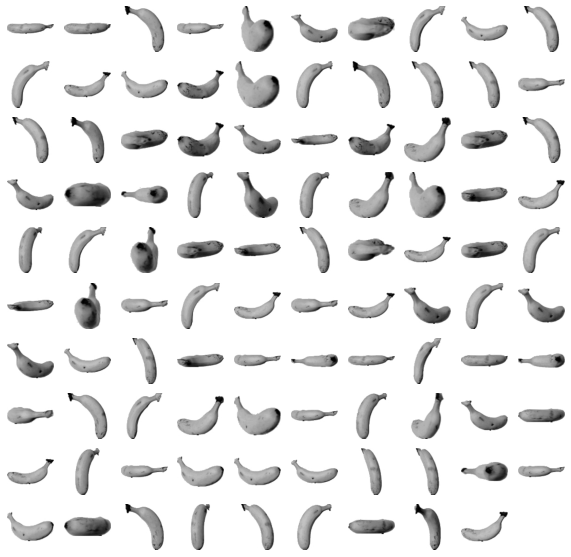

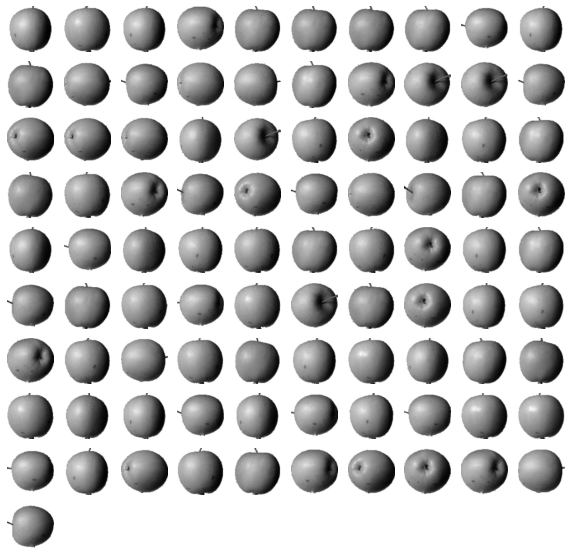

In [25]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

여전히 파인애플은 사과와 조금 혼돈되는 면이 있다.


---

훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점 --> 시각화 용이

지금 fruits_pca는 2개의 특성이 있기 때문에, 2차원으로 표현할 수 있다.

앞에서 찾은 km.labels_를 사용하여 클러스터별로 나누어 산점도를 그려보자.

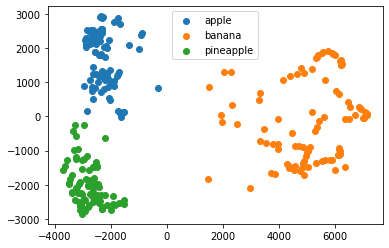

In [27]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

2개의 특성만을 사용했는데 클러스터의 산점도가 아주 잘 구분된다.

사과와 파인애플 클러스터의 경계가 가깝게 붙어 있어서, 혼동이 일어나기 쉽다.